In [602]:
from aocd import get_data
data = get_data(day=10, year=2023)

In [632]:
import numpy as np

In [122]:
data = '''.....
.S-7.
.|.|.
.L-J.
.....'''

In [70]:
data = '''..F7..
.FJ|..
SJ.L7.
|F--J.
LJ....'''

In [603]:
max_depth = 0
m = np.array([list(x) for x in data.splitlines()])
visited = set()
S = [x[0] for x in np.where(m == 'S')]

class N:
    def __init__(self, pos, sym, depth, parent=None):
        self.pos = pos
        self.sym = sym
        self.depth = depth
        self.parent = parent
        self.children = []

    def walk(self):
        queue = [self]

        while queue:
            current_node = queue.pop(0)
            y, x = current_node.pos

            if x < m.shape[1]-1 and (y, x + 1) != current_node.parent and current_node.sym in 'S-FL':
                r = m[y, x + 1][0]
                if r in '-7J':
                    if current_node._add(N((y, x + 1), r, current_node.depth + 1, current_node.pos)):
                        queue.append(current_node.children[-1])
                    else:
                        break

            if y < m.shape[0]-1 and (y + 1, x) != current_node.parent and current_node.sym in 'S|F7':
                b = m[y + 1, x][0]
                if b in '|LJ':
                    if current_node._add(N((y + 1, x), b, current_node.depth + 1, current_node.pos)):
                        queue.append(current_node.children[-1])
                    else:
                        break

            if x > 0 and (y, x - 1) != current_node.parent and current_node.sym in 'S-7J':
                l = m[y, x - 1][0]
                if l in '-FL':
                    if current_node._add(N((y, x - 1), l, current_node.depth + 1, current_node.pos)):
                        queue.append(current_node.children[-1])
                    else:
                        break

            if y > 0 and (y - 1, x) != current_node.parent and current_node.sym in 'S|LJ':
                t = m[y - 1, x][0]
                if t in '|F7':
                    if current_node._add(N((y - 1, x), t, current_node.depth + 1, current_node.pos)):
                        queue.append(current_node.children[-1])
                    else:
                        break

    def _add(self, n):
        global max_depth
        if n.pos in visited:
            self.children.append(n)
            return False
        else:
            visited.add(n.pos)
            self.children.append(n)
            if n.depth > max_depth:
                max_depth = n.depth
            return True

    def __str__(self):
        r = '' + repr(self)
        for c in self.children:
            r += f"\n{c}"
        return r

    def __repr__(self):
        return f"{'  ' * self.depth}N({self.pos}, sym={self.sym}, depth={self.depth}, parent={self.parent})"

root = N(S, 'S', 0)
root.walk()
#print(root)
max_depth

6927

In [604]:
def inspect(pos, size=1):
    r0 = 0+size
    r1 = 1+size
    print(m[(pos[0]-r0):(pos[0]+r1), (pos[1]-r0):(pos[1]+r1)])
inspect(S, 2)

[['-' 'J' 'L' 'J' 'L']
 ['-' '-' '7' 'F' '7']
 ['-' '-' 'S' '|' '|']
 ['-' '-' '7' '|' '|']
 ['F' '7' '|' '|' '|']]


In [592]:
data = '''FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L'''
max_depth = 0
m = np.array([list(x) for x in data.splitlines()])
visited = set()
S = [x[0] for x in np.where(m == 'S')]
root = N(S, 'S', 0)
root.walk()
max_depth

80

In [622]:
from scipy import ndimage
from skimage.segmentation import clear_border
from skimage.measure import points_in_poly
from skimage import measure
from skimage import draw
from PIL import Image as im 
%matplotlib inline 
from matplotlib import pyplot as plt
import sys

In [624]:
sys.setrecursionlimit(100000)

In [625]:
l, r = root.children
def form_poly(r, poly):
    poly.append(r.pos)
    for e in r.children:
        form_poly(e, poly)
    return poly
rline = form_poly(r, [])
lline = form_poly(l, [])[::-1]
full_line = rline + lline
#print(f"{rline[0]} to {rline[1]} {len(rline)}")
#print(f"{lline[0]} to {lline[1]} {len(lline)}")
len(full_line)

13854

In [596]:
#pathed = np.zeros(m.shape, dtype=int)
#for e in visited:
#    pathed[e] = 1
pathed = None

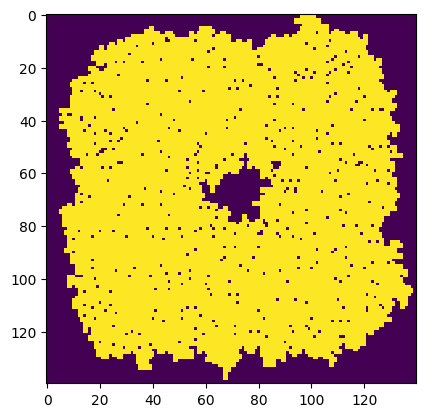

In [650]:
drawn_poly = np.zeros(m.shape, dtype=int)
for p in full_line:
    drawn_poly[p] = 1
drawn_poly[root.pos[0],root.pos[1]] = 1 # why didnt my line have it whatever
plt.imshow(drawn_poly, interpolation='nearest')
plt.show()

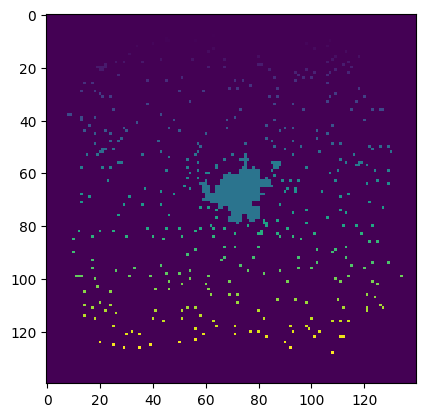

In [627]:
group_labeled, gcount = ndimage.label(ndimage.binary_fill_holes(drawn_poly).astype(int) - drawn_poly)
plt.imshow(group_labeled, interpolation='nearest')
plt.show()

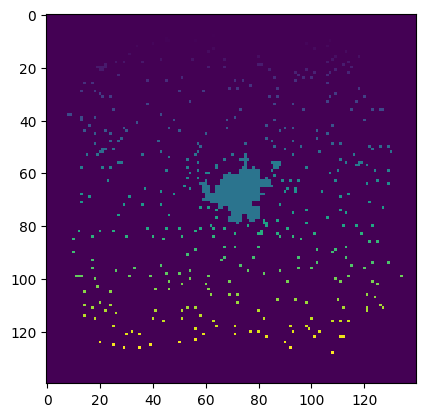

In [628]:
full = (drawn_poly+group_labeled+1).astype(int)
plt.imshow(full, interpolation='nearest')
plt.show()

In [633]:
nxp = drawn_poly
total = 0
for i in range(1, gcount+1):
    w = np.where(group_labeled == i)
    #print(w)
    #print(list(zip(*w)))
    r = points_in_poly(list(zip(*w)), full_line)
    if all(r):
        for e in zip(*w):
            nxp[e] = i
        total += len(list(zip(*w)))
        #print(f"{i} is in with {}")

    #print('')
total

467